<center><h1>bogaziciAI Fall 2023 Beginner Level</h1></center>
<center><h2>Assignment 1</h2></center>

<center><h3>Grading Table</h3></center>

|             | Part 1 | Part 2      | Part 3 | General Otline      | Total |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| **Points**      | 30     | 30          | 30     | 10                  | 100   |

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scikit-learn
!pip install folium

In [2]:
#importing the neccessary libs
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('real_estate.csv')
df.head()

,No,transactiondate,houseage,distancetostation,numberofstores,latitude,longitude,housepriceofunitarea
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#detecting null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    414 non-null    int64  
 1   transactiondate       414 non-null    float64
 2   houseage              414 non-null    float64
 3   distancetostation     414 non-null    float64
 4   numberofstores        414 non-null    int64  
 5   latitude              414 non-null    float64
 6   longitude             414 non-null    float64
 7   housepriceofunitarea  414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
#visualization location on map.
start_location = [df['latitude'].mean(), df['longitude'].mean()]
map = folium.Map(location = start_location, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(map)

for _, row in df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                       radius = 5).add_to(marker_cluster)
    
map

According to map data, 205 of the houses are close to each other in location. And all the houses are at Taiwan.

Text(0.5, 1.0, 'Correlation Matrix')

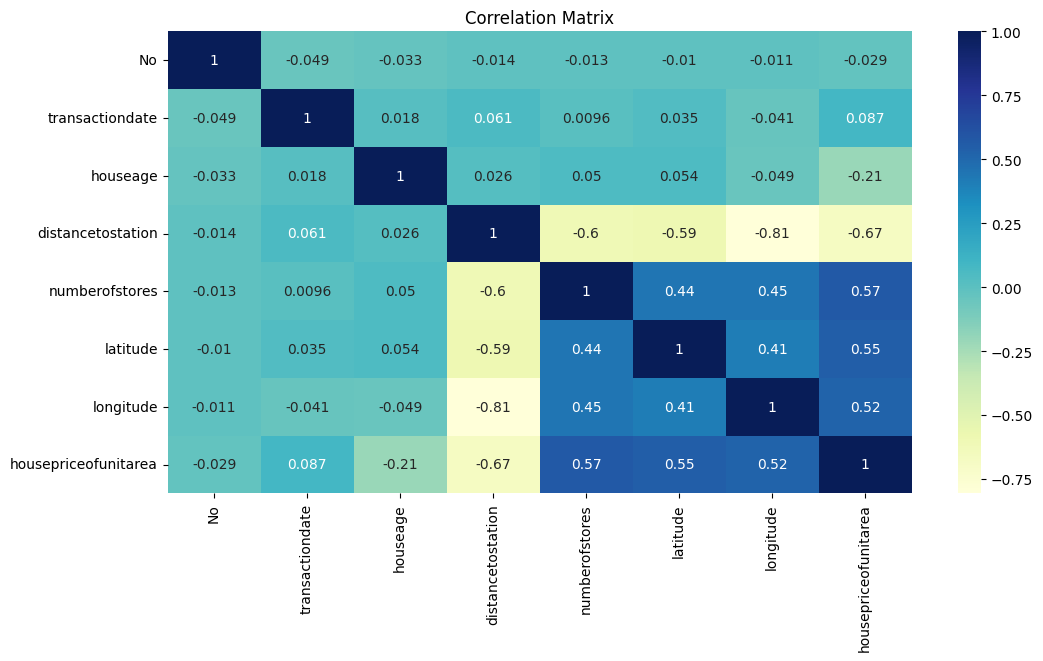

In [6]:
#correlation heatmap of all features
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')

Latitude,Longtitude and distancetostation are negatively correlated. But it doesnt make any sense so ill drop it after training raw.

Text(0, 0.5, 'Unit Area Price ($)')

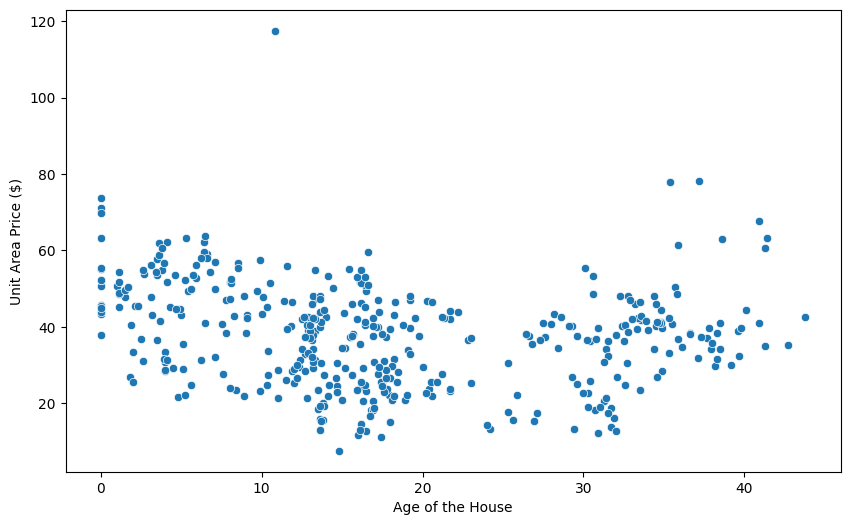

In [7]:
#house age and price per unit scatter
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'houseage', y='housepriceofunitarea', data=df)
plt.xlabel('Age of the House')
plt.ylabel('Unit Area Price ($)')

Prices increase with age, but this is not very noticeable

# Task

In this task, you are expected to:

* Part 1: Make a linear regression analysis to predict housepriceofunitarea.
* Part 2: Use the normal equation for your linear regression analysis to verify your results.
* Part 3: Make a polynomial regression analysis (You can decide on the Nth degree).

<br>
You can drop the features that you find unnecessary.
<br>
You can use sklearn module to perform your analysis.
<br> 
It is advised to explore and visualize the dataset first.

# Part 1

In [8]:
X = df.drop('housepriceofunitarea', axis=1)
y = df['housepriceofunitarea']

#splitting data into train and test.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

#training
model = LinearRegression()
model.fit(Xtrain, ytrain)

y_prediction = model.predict(Xtest)

# measurement
mse = mean_squared_error(ytest,y_prediction)
r2 = r2_score(ytest, y_prediction)
print("MSE:", mse)
print("R2:", r2)

MSE: 54.6019606733782
R2: 0.6745228670350807


In [9]:
#Dropping the unnec columns
will_be_dropped = ['longitude', 'latitude']
df = df.drop(will_be_dropped, axis = 1)


X = df.drop('housepriceofunitarea', axis=1)
y = df['housepriceofunitarea']

#splitting data into train and test.
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

#training
model = LinearRegression()
model.fit(Xtrain, ytrain)

y_prediction = model.predict(Xtest)
mse = mean_squared_error(ytest,y_prediction)
r2 = r2_score(ytest, y_prediction)
print("MSE:", mse)
print("R2:", r2)

MSE: 57.92394899590261
R2: 0.6547208082514049


mse increased r2 decreased so im not going to use this method

# Part 2

In [10]:
X_with_bias = np.c_[np.ones((Xtrain.shape[0], 1)), Xtrain]
theta = np.linalg.inv(X_with_bias.T.dot(X_with_bias)).dot(X_with_bias.T).dot(ytrain)
X_test_with_bias = np.c_[np.ones((Xtest.shape[0], 1)), Xtest]
y_pred = np.dot(X_test_with_bias, theta)
y_pred

array([48.73007218, 41.82771289, 41.89278781, 38.11723885, 25.99476615,
       46.07444001, 42.38215378, 45.00427905, 28.45712028, 55.81102243,
       34.49487404, 36.66149734, 31.59886853, 28.19284796, 34.283327  ,
       33.0805097 , 45.24828681, 48.65758894, 28.97827575, 46.5945126 ,
        0.54422002, 35.48844663, 45.67140172, 48.16815402, 13.46086837,
       37.51852226, 14.51801203, 42.29781701, 37.77533079, 35.56823798,
       14.64624676, 38.68440732, 38.31784579, 32.27129175, 46.64473706,
       30.36008177, 50.77403787, 14.91653871, 47.98298392, 39.87326833,
       37.45002088, 39.49328273, 47.21167102, 34.87188333, 40.95336719,
       47.30176829, 44.59615957, 23.14268564, 48.48342346, 43.19997624,
       50.0685616 , 46.24137131, 40.22355708, 42.61419706, 36.77590368,
       18.02800452, 40.21093826, 33.34514391, 28.76385414, 45.18446476,
       31.44507868, 31.01420682, 17.49581922,  9.04553862,  5.31293005,
       32.88969593, 33.31842738, 49.04519013, 32.74011024, 35.54

In [11]:
mse = mean_squared_error(ytest,y_pred)
r2 = r2_score(ytest, y_pred)
print(mse)
r2

57.92394913477807


0.6547208074235815

# Part 3

In [12]:
X = df.drop('housepriceofunitarea', axis = 1)
y = df['housepriceofunitarea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(ytest, y_pred)
print("MSE:", mse)
print("R2:", r2)

MSE: 47.77134247541671
R2: 0.7152395372797531
